In [2]:
import numpy as np
import matplotlib.pyplot as plt
from graspy.inference import SemiparametricTest
from graspy.embed import AdjacencySpectralEmbed
import seaborn as sns
import warnings
from graspy.simulations import binary_sbm
from graspy.utils import symmetrize

warnings.filterwarnings("ignore")
FONTSIZE = 30

def double_plot(A, X):
    fig, ax = plt.subplots(1, 2, figsize=(20,10))
    sns.heatmap(A, ax=ax[0], xticklabels=False, yticklabels=False, cbar=False, cmap='Blues')
    sns.scatterplot(X[:,0], X[:,1], ax=ax[1],alpha = 0.5,s=100)
    ax[1].get_xaxis().set_visible(False)
    ax[1].get_yaxis().set_visible(False)
    ax[0].set_title('Adjacency matrix', fontsize=FONTSIZE)
    ax[1].set_title('Adjacency spectral embedding',fontsize=FONTSIZE)
    return ax

def rdpg(latent_positions):
    """
    """
    P = np.dot(latent_positions, latent_positions.T)
    if P.min() < 0:
        P = P + P.min()
    if P.max() > 1:
        P = P / P.max()
    A = np.random.binomial(1, P)
    A = symmetrize(A)
    return A

def measure_connectivity(A, sizes):
    cstart = 0
    rstart = 0
    connectivity = np.zeros((len(sizes), len(sizes)))
    for cidx, size in enumerate(sizes): 
        for ridx in range(len(sizes)):
            p = np.mean(A[rstart:rstart+size, cstart:cstart+size])
            connectivity[ridx, cidx] = p
            rstart += size
        cstart += size
        rstart = 0
    return connectivity

AttributeError: 'numpy.ndarray' object has no attribute 'set_ylabel'

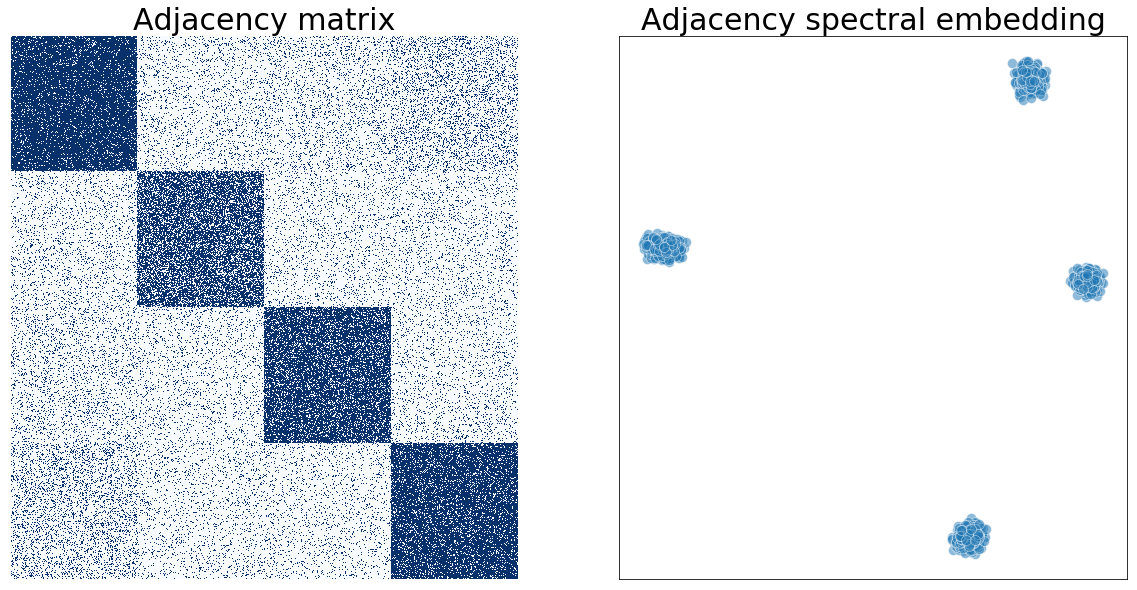

In [3]:
k = 4 # the number of embedding dimensions for ASE
P = np.array([[0.9, 0.11, 0.13, 0.2],
              [0, 0.7, 0.1, 0.1], 
              [0, 0, 0.8, 0.1],
              [0, 0, 0, 0.85]])

P = symmetrize(P)
csize=1000
A1 = binary_sbm([csize, csize, csize, csize], P)
A1 = symmetrize(A1)
X1 = AdjacencySpectralEmbed(k=k).fit_transform(A1)
ax = double_plot(A1, X1)
ax.set_ylabel('Simulated SBM')


In [4]:
A2 = rdpg(X1)
A2 = symmetrize(A2)

sizes = [1000, 1000, 1000, 1000]


conn1 = measure_connectivity(A1, sizes)
conn2 = measure_connectivity(A2, sizes)


print('Expected:')
print(P)
print('')

print('Original SBM connectivity:')
print(conn1)
print('')

print('RDPG simulation 1:')
print(conn2)
print('')


Expected:
[[0.9  0.11 0.13 0.2 ]
 [0.11 0.7  0.1  0.1 ]
 [0.13 0.1  0.8  0.1 ]
 [0.2  0.1  0.1  0.85]]

Original SBM connectivity:
[[0.89917  0.110312 0.129711 0.199392]
 [0.110312 0.699092 0.099874 0.100341]
 [0.129711 0.099874 0.798782 0.100158]
 [0.199392 0.100341 0.100158 0.8488  ]]

RDPG simulation 1:
[[0.898554 0.110085 0.128988 0.199221]
 [0.110085 0.698886 0.099454 0.100063]
 [0.128988 0.099454 0.798727 0.100185]
 [0.199221 0.100063 0.100185 0.849491]]

